# Business Question:
## How can we effectively identify individuals at risk of experiencing a second heart attack?

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()
file_path = next(iter(uploaded))

Saving HeartAttack.csv to HeartAttack (1).csv


In [ ]:
# Read the file
df = pd.read_csv("HeartAttack.csv")
print(f"Number of records: {df.shape[0]:,}\nNumber of columns: {df.shape[1]:,}")

Number of records: 138
Number of columns: 8


In [ ]:
df.head()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes
2,52,1,0,0,174,1,35,No
3,66,2,1,1,169,0,60,Yes
4,70,3,0,1,237,0,65,Yes


In [ ]:
df.describe

<bound method NDFrame.describe of      Age  Marital_Status  Gender  Weight_Category  Cholesterol  \
0     60               2       0                1          150   
1     69               2       1                1          170   
2     52               1       0                0          174   
3     66               2       1                1          169   
4     70               3       0                1          237   
..   ...             ...     ...              ...          ...   
133   54               1       0                0          170   
134   59               1       0                0          172   
135   55               3       0                0          122   
136   73               2       1                1          236   
137   62               3       0                0          185   

     Stress_Management  Trait_Anxiety 2nd_Heart_Attack  
0                    1             50              Yes  
1                    0             60              Yes  
2                    1             35               No  
3                    0             60              Yes  
4                    0             65              Yes  
..                 ...            ...              ...  
133                  1             35               No  
134                  0             60               No  
135                  1             45               No  
136                  0             60              Yes  
137                  1             65               No  

[138 rows x 8 columns]>

## Heat Map: Handling Missing Values

<Axes: >

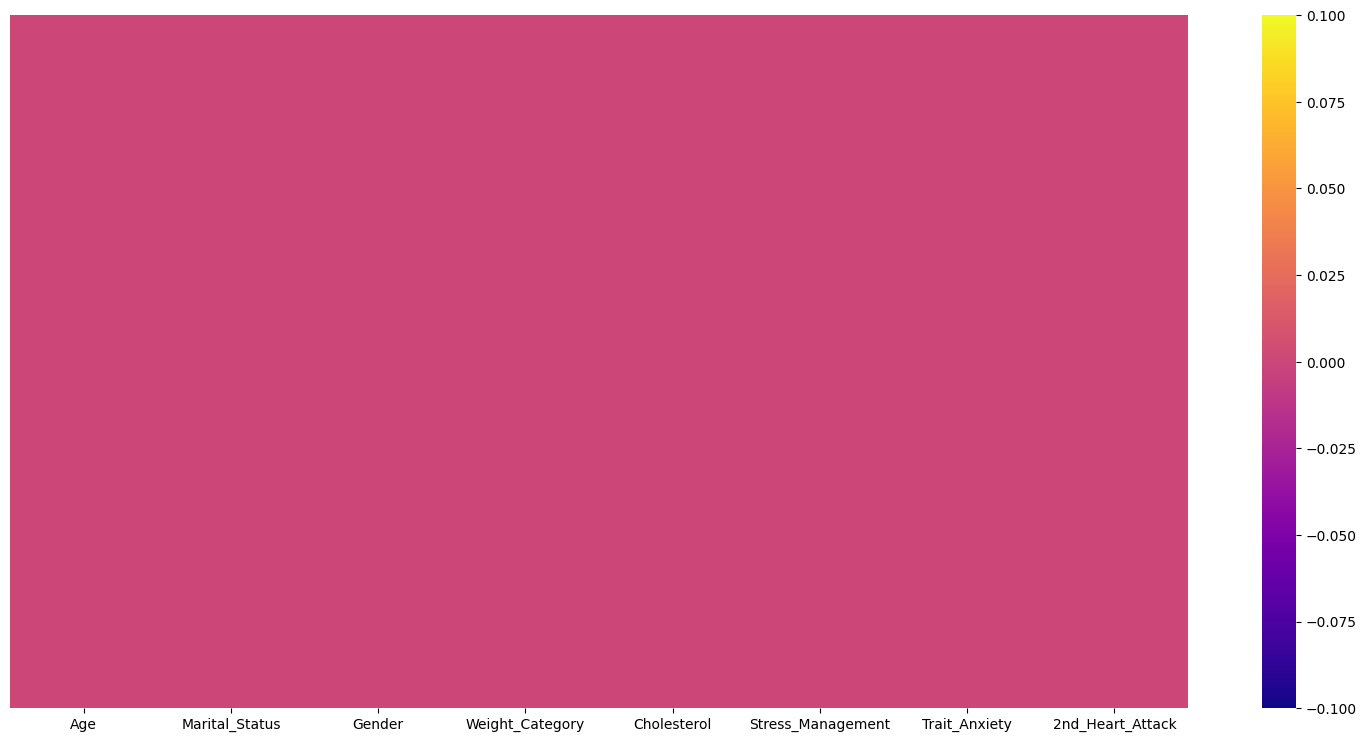

In [ ]:
import seaborn as sns
# visualizing missing values
fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(df.isnull(), yticklabels=False,cmap='plasma')

In [ ]:
# Count missing values per column
missing_values = df.isnull().sum()

# Calculate percentage of missing values per column
percentage_missing = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Display the summary
print(missing_data_summary)

                   Missing Values  Percentage Missing
Age                             0                 0.0
Marital_Status                  0                 0.0
Gender                          0                 0.0
Weight_Category                 0                 0.0
Cholesterol                     0                 0.0
Stress_Management               0                 0.0
Trait_Anxiety                   0                 0.0
2nd_Heart_Attack                0                 0.0


In [ ]:
# Display the info of the cleaned DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                138 non-null    int64 
 1   Marital_Status     138 non-null    int64 
 2   Gender             138 non-null    int64 
 3   Weight_Category    138 non-null    int64 
 4   Cholesterol        138 non-null    int64 
 5   Stress_Management  138 non-null    int64 
 6   Trait_Anxiety      138 non-null    int64 
 7   2nd_Heart_Attack   138 non-null    object
dtypes: int64(7), object(1)
memory usage: 8.8+ KB


## Logistic Regression

In [ ]:
# Split the data into features and target variable
X = df.drop(columns=['2nd_Heart_Attack'])
y = df['2nd_Heart_Attack']

# Split data into train and test sets
# 80/20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8928571428571429

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.92      0.89        13
         Yes       0.93      0.87      0.90        15

    accuracy                           0.89        28
   macro avg       0.89      0.89      0.89        28
weighted avg       0.90      0.89      0.89        28


Confusion Matrix:
[[12  1]
 [ 2 13]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model seems to perform well with an accuracy of approximately 89%. However, there might be room for improvement, especially in correctly identifying the ‘Yes’ instances, as indicated by the recall of 0.87. This could potentially be addressed by increasing the sample size or collecting more data for training the model.

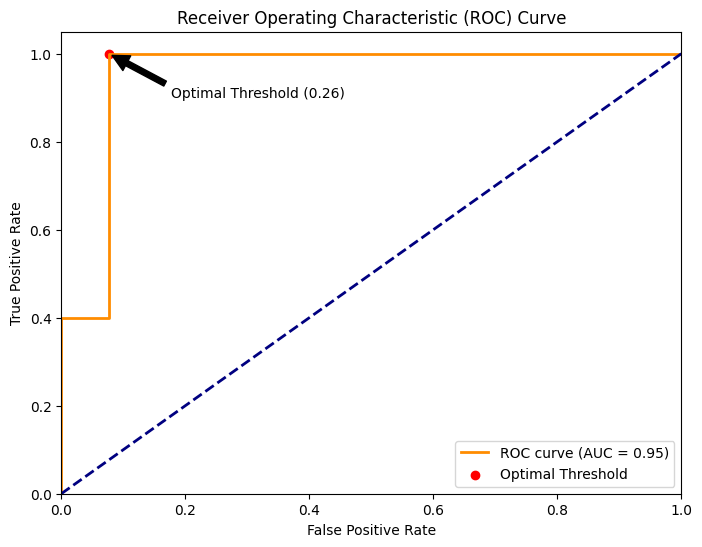

In [ ]:
from sklearn.metrics import roc_curve, auc

# Convert 'Yes' and 'No' to 1 and 0
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, logreg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Find optimal threshold (maximize TPR and minimize FPR)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', label='Optimal Threshold')
plt.annotate(f'Optimal Threshold ({optimal_threshold:.2f})', xy=(fpr[optimal_threshold_index], tpr[optimal_threshold_index]), xytext=(fpr[optimal_threshold_index] + 0.1, tpr[optimal_threshold_index] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The Receiver Operating Characteristic (ROC) curve plot is a graphical representation of the performance of a binary classifier as its discrimination threshold is varied. The curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

In a ROC curve, the optimal threshold point is typically the one that is closest to the top left corner of the plot. This point represents the best balance between sensitivity (True Positive Rate) and specificity (False Positive Rate). Sensitivity measures the proportion of actual positives that are correctly identified as such. In the case of this study/business question, it would be the proportion of individuals at risk of a second heart attack who are correctly identified as at risk.

The optimal threshold point, notated with a red dot on the graph, maximizes both sensitivity and specificity, which means it correctly identifies as many individuals at risk as possible (high sensitivity), while minimizing the number of false alarms (high specificity).

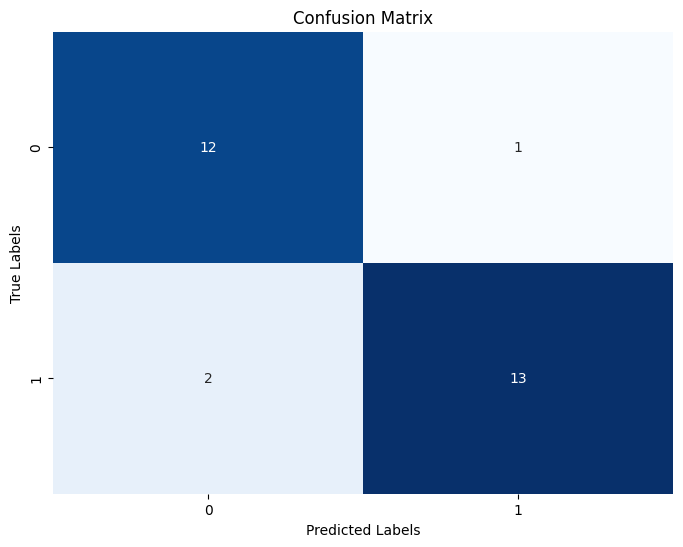

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


A True Positive (TP) refers to the cases where the model correctly identified individuals who are at risk of experiencing a second heart attack. There are 13 TPs, meaning the model correctly identified 13 individuals who are at risk.

On the other hand, a False Negative (FN) refers to the cases where the model incorrectly identified individuals who are at risk of experiencing a second heart attack as not being at risk. In the matrix, there are 2 FNs, meaning the model failed to identify 2 individuals who are actually at risk.

In [ ]:
# Predict probabilities for the test data
probabilities = logreg_model.predict_proba(X_test)

# Create a DataFrame to store the probabilities and actual values
prob_df = pd.DataFrame(probabilities, columns=['Probability_No', 'Probability_Yes'])
prob_df['Actual_Value'] = y_test.reset_index(drop=True)

print(prob_df.head())


   Probability_No  Probability_Yes Actual_Value
0        0.226248         0.773752          Yes
1        0.189692         0.810308           No
2        0.132958         0.867042          Yes
3        0.203156         0.796844          Yes
4        0.882478         0.117522           No


The predicted probabilities provide insights into the model's confidence in its predictions for each individual. Higher probabilities indicate a higher likelihood of the predicted outcome, while lower probabilities suggest a lower likelihood. Comparing these probabilities with the actual outcomes helps in assessing the model's performance and understanding its strengths and limitations in predicting second heart attacks.

The model's prediction aligns with the actual outcome observed in the test data for all instances EXCEPT for observation #1. In this case, the model predicts a higher probability (81%) for the individual to experience a second heart attack ('Yes') compared to not experiencing it ('No'). However, the actual outcome observed in the test data is 'No'.

This observation highlights a potential misclassification by the model. Despite assigning a higher probability to 'Yes', the actual outcome contradicts this prediction. It indicates a false positive scenario where the model predicted a second heart attack, but it did not occur.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with k=5 (increasing the number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9285714285714286

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.92      0.92        13
         Yes       0.93      0.93      0.93        15

    accuracy                           0.93        28
   macro avg       0.93      0.93      0.93        28
weighted avg       0.93      0.93      0.93        28


Confusion Matrix:
[[12  1]
 [ 1 14]]


The KNN model seems to perform well with an accuracy of approximately 92.86%. The precision, recall, and F1-score are also high, indicating that the model has a good balance in correctly identifying both ‘Yes’ and ‘No’ instances of a second heart attack occuring.

#### Initialize a Data Frame with Two Columns: K and Accuracy

In [ ]:
# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['k', 'accuracy'])

# Define a list of values for k
k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ## Overfitting observed

# Iterate through each value of k
for k in k_values:
    # Initialize KNN model with current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Add a row to the DataFrame with k and its corresponding accuracy
    results_df = results_df.append({'k': k, 'accuracy': accuracy}, ignore_index=True)

# Display the DataFrame
print(results_df)

      k  accuracy
0   5.0  0.928571
1  10.0  0.750000
2  15.0  0.750000
3  20.0  0.714286
4  25.0  0.714286
5  30.0  0.714286
6  35.0  0.750000
7  40.0  0.750000
8  45.0  0.750000
9  50.0  0.750000


<ipython-input-32-e788abef01fb>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'k': k, 'accuracy': accuracy}, ignore_index=True)
<ipython-input-32-e788abef01fb>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'k': k, 'accuracy': accuracy}, ignore_index=True)
<ipython-input-32-e788abef01fb>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'k': k, 'accuracy': accuracy}, ignore_index=True)
<ipython-input-32-e788abef01fb>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'k': k, 'accuracy': accuracy}, ignore_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize a list to store accuracy values for different Ks
accuracy_values = []

# Define a range of values for K
k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Iterate through each value of K
for k in k_values:
    # Initialize KNN model with current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append((k, accuracy))

# Choose the K with the highest accuracy
best_k = max(accuracy_values, key=lambda x: x[1])[0]
print("Best K based on accuracy:", best_k)


Best K based on accuracy: 5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize a list to store accuracy values for different Ks
accuracy_values = []

# Define a range of values for K
k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Iterate through each value of K
for k in k_values:
    # Initialize KNN model with current value of k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append((k, accuracy))

# Sort accuracy values in descending order based on accuracy
sorted_accuracy_values = sorted(accuracy_values, key=lambda x: x[1], reverse=True)

# Choose the K with the second highest accuracy
second_best_k = sorted_accuracy_values[1][0]  # Index 1 corresponds to the second highest accuracy
print("Second Best K based on accuracy:", second_best_k)


Second Best K based on accuracy: 10


The codes above evaluates the accuracy of the model for various values of k, ranging from 5 to 50, representing the number of neighbors considered in the KNN algorithm. The purpose is to observe how the model's accuracy varies with different neighborhood sizes. The choice of k values in increments of 5 was deliberate to efficiently explore a range of options and identify the optimal performing model.

It's worth noting that testing the model with k values less than 5 resulted in observed overfitting, where the model became too specific to the training data and performed poorly on unseen data. Hence, focusing on values of k greater than or equal to 5 ensured a more robust and generalizable model.

After evaluating the accuracy scores for different values of k, the best k-value is determined to be 5. This means that considering the five nearest neighbors generally leads to the highest accuracy on the test set.

The second best k-value is determined to be 10. This suggests that, after k=5, increasing the number of neighbors to 10 provides the next best performance in terms of accuracy.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming df contains your dataset with appropriate features and labels

# Features and labels
X = df[['Age', 'Marital_Status', 'Gender', 'Weight_Category', 'Cholesterol', 'Stress_Management', 'Trait_Anxiety']]
y = df['2nd_Heart_Attack']

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=4).fit(X, y)

# Predict likelihood of a second heart attack for each individual
distances, indices = knn.kneighbors(X)
predicted_attacks = knn.predict(X)

# Print the predicted likelihood of a second heart attack for each individual
print("Predicted Likelihood of Second Heart Attack for Each Individual:")
for i, predicted_attack in enumerate(predicted_attacks):
    print(f"Individual {i+1}: {predicted_attack}")

# Print distances and indices of nearest neighbors (for reference)
print('Distances:', distances)
print('Indices:', indices)

# Print the details of nearest neighbors for the first individual
print("Nearest Neighbor Details for the First Individual:")
print(df.iloc[indices[0], :])


Predicted Likelihood of Second Heart Attack for Each Individual:
Individual 1: Yes
Individual 2: Yes
Individual 3: No
Individual 4: Yes
Individual 5: Yes
Individual 6: No
Individual 7: No
Individual 8: No
Individual 9: No
Individual 10: No
Individual 11: No
Individual 12: Yes
Individual 13: Yes
Individual 14: Yes
Individual 15: Yes
Individual 16: Yes
Individual 17: No
Individual 18: No
Individual 19: No
Individual 20: No
Individual 21: No
Individual 22: Yes
Individual 23: Yes
Individual 24: No
Individual 25: Yes
Individual 26: Yes
Individual 27: Yes
Individual 28: No
Individual 29: No
Individual 30: No
Individual 31: Yes
Individual 32: Yes
Individual 33: No
Individual 34: No
Individual 35: Yes
Individual 36: Yes
Individual 37: No
Individual 38: Yes
Individual 39: Yes
Individual 40: Yes
Individual 41: No
Individual 42: No
Individual 43: No
Individual 44: Yes
Individual 45: Yes
Individual 46: No
Individual 47: No
Individual 48: No
Individual 49: Yes
Individual 50: No
Individual 51: Yes
I

In [ ]:
# Print the details of nearest neighbors for the second individual
print("Nearest Neighbor Details for the Second Individual:")
print(df.iloc[indices[1], :])


Nearest Neighbor Details for the Second Individual:


NameError: name 'df' is not defined

The predicted likelihood of a second heart attack for each individual was determined using the features age, marital status, gender, weight category, cholesterol level, stress management, and trait anxiety. For Individual 1, the model predicted a high likelihood of a second heart attack, supported by the fact that the majority of its nearest neighbors, individuals with similar characteristics, had experienced a second heart attack. Similarly, for Individual 2, the model predicted a high likelihood of a second heart attack based on the observation that most of its nearest neighbors also had a history of second heart attacks. This interpretation suggests that individuals sharing similar attributes may exhibit similar health outcomes, highlighting the predictive capability of the model.